In [1]:
#importing all necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
# ✅ Reading the dataset
df = pd.read_csv('../datasets/hours-score.csv')
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Hours  Scores
0    1.0      25
1    2.0      45
2    3.0      50
3    4.0      65
4    5.0      75


In [3]:
# ✅ Splitting features and labels

# Option 1: Using iloc
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

#option 2: using drop()
X = df.drop('Scores',axis=1)  # Feature: Hours
y= df['Scores']                # Target: Scores

In [4]:
X

,Hours
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,1.5
6,2.5
7,3.5
8,4.5
9,5.5


In [5]:
X.shape

(10, 1)

In [6]:
y

0    25
1    45
2    50
3    65
4    75
5    30
6    48
7    55
8    70
9    78
Name: Scores, dtype: int64

In [7]:
y.shape

(10,)

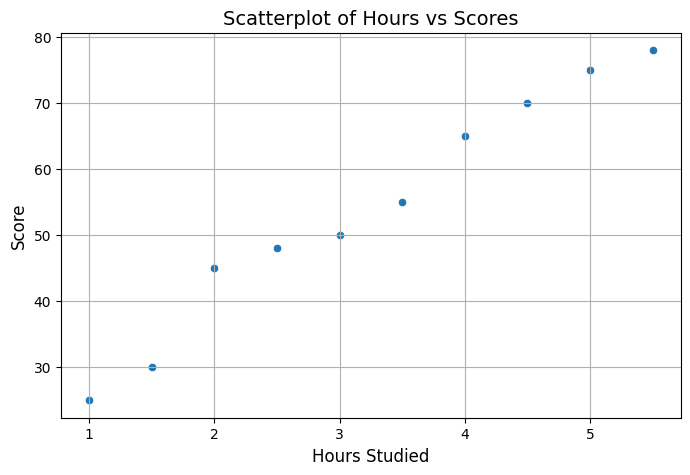

In [8]:
# 🎯 Visualizing the relationship between Hours and Scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title("Scatterplot of Hours vs Scores", fontsize=14)
plt.xlabel("Hours Studied", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.grid(True)
plt.show()

In [9]:
# ✅ Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [10]:
X_train

,Hours
5,1.5
0,1.0
7,3.5
2,3.0
3,4.0
6,2.5
9,5.5
8,4.5


In [11]:
X_train.shape

(8, 1)

In [12]:
X_test

,Hours
4,5.0
1,2.0


In [13]:
X_test.shape

(2, 1)

In [14]:
y_train

5    30
0    25
7    55
2    50
3    65
6    48
9    78
8    70
Name: Scores, dtype: int64

In [15]:
y_train.shape

(8,)

In [16]:
y_test

4    75
1    45
Name: Scores, dtype: int64

In [17]:
y_test.shape

(2,)

In [18]:
# ✅ Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.intercept_

np.float64(13.788649706457903)

In [20]:
model.coef_

array([12.18395303])

In [21]:
#Predict on test data
y_pred = model.predict(X_test)
y_pred

array([74.70841487, 38.15655577])

In [22]:
#evaluating the model

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation:
Mean Squared Error (MSE): 23.46
R² Score: 0.90


In [27]:
# ✅ Comparing Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted Scores:")
print(comparison)


Comparison of Actual vs Predicted Scores:
   Actual  Predicted
4      75  74.708415
1      45  38.156556


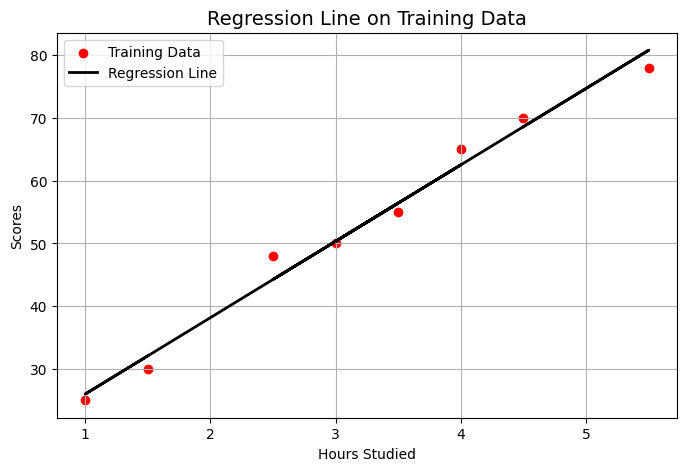

In [24]:
# ✅ Plotting regression line on training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='black', linewidth=2, label='Regression Line')
plt.title('Regression Line on Training Data', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

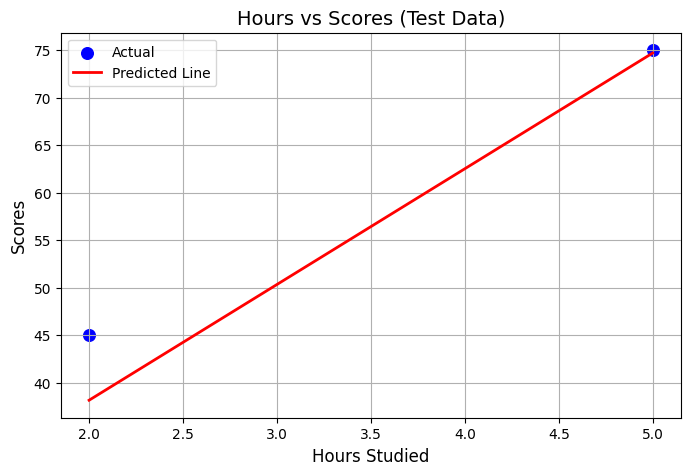

In [25]:
# Plotting the original data points
plt.figure(figsize=(8, 5))
plt.scatter(X_test,y_test,color='blue',label='Actual', s=70)

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')

# Labels and title
plt.title('Hours vs Scores (Test Data)', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
